In [2]:
%cd ..
%load_ext autoreload
%autoreload 2
import pickle

/Users/gimli/projects/igre


In [56]:
with open("data/processed/metacentrum/07-pickled.pkl", "rb") as src:
    data = pickle.load(src)

In [5]:
data

[[-20.6, -50.0, -4, 15.0, 21.599123001098633, 49.99970245361328],
 [50.0, 7.34, -6, 13.0, 39.00004196166992, 45.66031265258789],
 [-1.0, -5.0, -14, 10.0, 79.00005340576172, 52.00082015991211],
 [0.0, -5.0, 12, 6.0, -2.9999985694885254, 32.00066375732422],
 [-20.6, -50.0, 10, 11.0, 8.599723815917969, 70.99995422363281],
 [-20.6, -20.6, -2, 7.0, 20.599660873413086, 20.60099983215332],
 [-5.0, -5.0, -14, 14.0, 81.99961853027344, 49.99998474121094],
 [-20.6, -12.5, 9, 8.0, 20.599302291870117, 12.49995231628418],
 [-2.6, -50.0, 11, 14.0, 0.6002050042152405, 31.00006866455078],
 [7.34, 1.0, 12, 1.0, -1.339910626411438, 22.999250411987305],
 [20.6, -20.6, 11, 3.0, -20.600135803222656, 20.59938621520996],
 [-20.6, 0.0, -2, 0.0, 20.599409103393555, 0.00033943215385079384],
 [50.0, 0.0, 5, 13.0, -49.99993133544922, 0.0002843227703124285],
 [-5.0, 9.2, -3, 2.0, 4.9993157386779785, -9.200409889221191],
 [12.5, -35.1, 4, 6.0, -12.500316619873047, 35.09918212890625],
 [-20.6, 35.1, 10, 5.0, 8.600510

In [57]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ["x_shift", "y_shift", "distance", "repeat", "x_est", "y_est"]

In [58]:
df.groupby(["x_shift", "y_shift", "distance"]).mean()

repeat       x_est       y_est
x_shift y_shift distance                                
-50.0   -50.0   -15          7.5  129.123787  114.750072
                -14          7.5   64.874985   97.062237
                -13          7.5   48.812462   96.624967
                -12          7.5   61.687595  101.625265
                -11          7.5  115.988977  154.439209
                -10          7.5  148.669619  204.905810
                -9           7.5  156.812417  227.505933
                -8           7.5  151.687291  227.829359
                -7           7.5  135.874856  188.189291
                -6           7.5   49.499875  111.937420
                -5           7.5   38.312422   87.625034
                -4           7.5   50.062717   50.000251
                -3           7.5   50.250000   49.999987
                -2           7.5   50.000052   49.999950
                -1           7.5   50.124968   50.000016
                 0           7.5   50.000103   49.999655
                 1           7.5   50.000031   49.999947
                 2           7.5   50.000021   49.937634
                 3           7.5   50.187478   49.999706
                 4           7.5   49.874720   49.999984
                 5           7.5   50.062394   49.937821
                 6           7.5   49.999865   49.937495
                 7           7.5   43.999956   53.187477
                 8           7.5   39.437631   71.625145
                 9           7.0   30.933548   64.666688
                 10          7.0   23.266639   75.666791
                 11          7.0   -1.866689   28.266858
                 12          7.0   15.133203   87.533261
                 13          7.0  163.799915  248.903040
        -35.1   -15          7.5  143.187572  103.662550
...                          ...         ...         ...
 50.0    35.1    13          9.5  115.252893  178.950657
         50.0   -15          9.5   57.449990   19.950175
                -14          9.5   23.850026   -6.349994
                -13          9.5   21.650057   -8.350107
                -12          9.5   25.500133   -0.099881
                -11          9.5   51.399943   30.749697
                -10          9.5   65.699955   97.599962
                -9           9.5   62.449585  121.749992
                -8           9.5   67.049976  106.650065
                -7           9.5   62.799824   64.500148
                -6           9.5   29.349948    4.550028
                -5           9.5   18.349905  -30.050016
                -4           9.5  -49.899978  -49.949984
                -3           9.5  -49.999770  -49.999830
                -2           9.5  -49.999733  -49.999933
                -1           9.5  -50.050094  -50.000267
                 0           9.5  -50.000099  -50.000100
                 1           9.5  -49.899980  -50.100127
                 2           9.5  -49.999910  -49.999959
                 3           9.5  -50.000037  -50.199896
                 4           9.5  -50.100101  -50.049828
                 5           9.5  -50.050018  -50.150160
                 6           9.5  -50.050037  -50.000256
                 7           9.5  -49.900219  -49.950077
                 8           9.5  -32.899879  -43.249831
                 9           9.5  -50.000019  -49.949793
                 10          9.5  -24.800049  -42.400065
                 11          9.5  -51.150080  -50.650056
                 12          9.5   12.199951  -31.400006
                 13          9.5  106.899716  164.497649

[10121 rows x 3 columns]

In [66]:
import numpy as np
df["err"] = np.power((df["x_shift"] + df["x_est"]),2) + np.power((df["y_shift"] + df["y_est"]),2)

In [67]:
converted = df.dropna(how="any").groupby(["x_shift", "y_shift", "distance"])["err"].agg("sum").reset_index()

In [68]:
import matplotlib.pyplot as plt

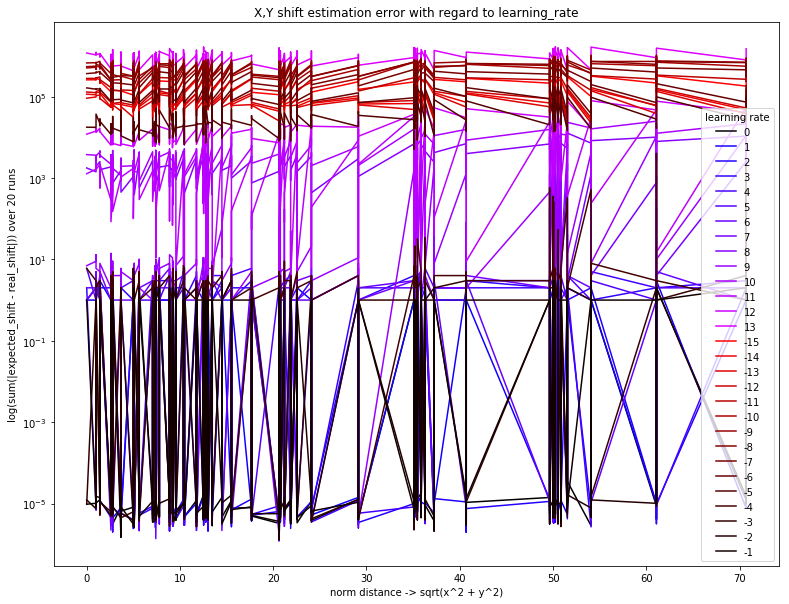

In [101]:
from scipy.ndimage.filters import maximum_filter1d as f1d
from scipy.ndimage.filters import gaussian_filter1d as f1gd
plt.figure(figsize=(13,10))
for dist in set(converted["distance"]):
    f1 = converted["distance"]==dist 
    srt = np.asarray(sorted(np.asarray(converted.where(f1).dropna(how="any")), 
           key=lambda x: np.sqrt(np.power(x[0],2) + np.power(x[1],2))))
    plt.plot(np.sqrt(np.power(srt[:, 0],2) + np.power(srt[:, 1],2)), srt[:, 3], 
             label=dist,
            color=[np.abs(dist)/15, 0.0, float(np.max([0, np.sign(dist)]))])
plt.yscale("log")
plt.legend(title="learning rate")
plt.ylabel("log(sum(|expected_shift - real_shift|)) over 20 runs")
plt.xlabel("norm distance -> sqrt(x^2 + y^2)")
plt.title("X,Y shift estimation error with regard to learning_rate")
plt.show()
#plt.savefig("reports/refine-shift.svg")

<IPython.core.display.Javascript object>


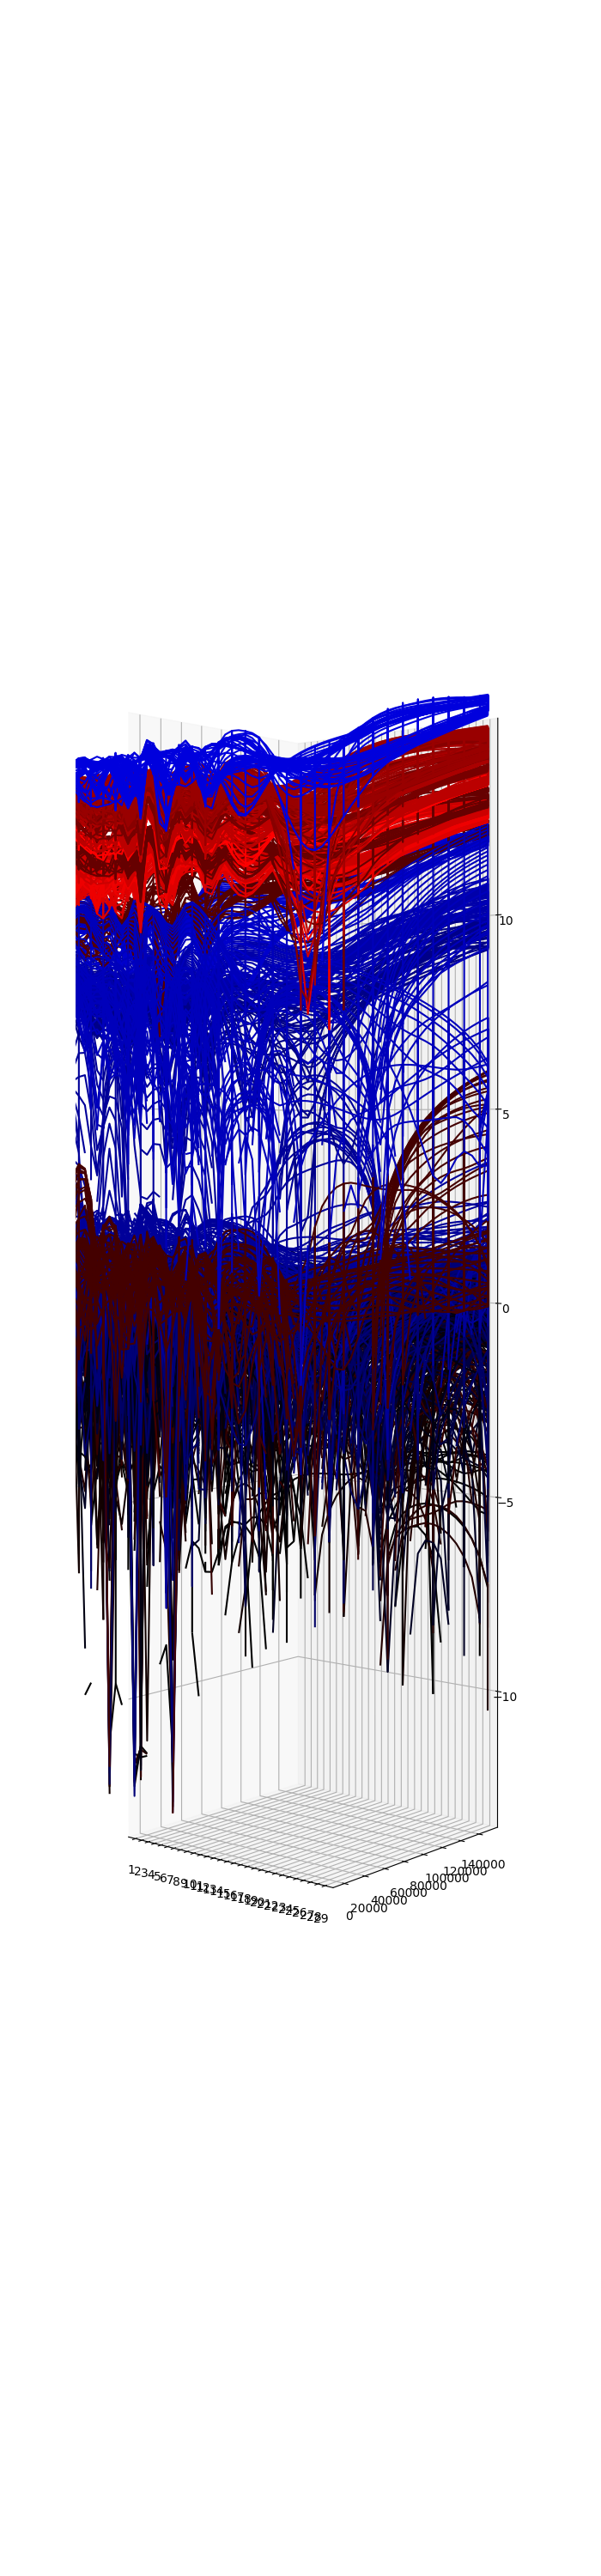

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [157]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import scipy
#X = np.array(list(set(ddd["x_shift"])))
#Y = np.array(list(set(ddd["y_shift"])))
#x,y = np.meshgrid(X,Y)
X = np.arange(-50,50,1)
Y = np.arange(-50,50,1)
x, y = np.meshgrid(X,Y)
fig = plt.figure(figsize=(7,30))
ax = fig.gca(projection="3d")
for dist in set(converted["distance"]):
    ddd = converted.where(converted["distance"]==dist).dropna(how="any")
    Z = scipy.interpolate.griddata((ddd["x_shift"], ddd["y_shift"]), ddd["err"], (x, y), method="cubic")
    ax.plot_wireframe(x,y, np.log(Z), color = [np.min([0, np.sign(dist)])*(-1)*np.abs(dist)/15, 0.0, np.abs(dist)/15 * float(np.max([0, np.sign(dist)]))])
plt.show()

In [161]:
errors = []
for dist in sorted(set(df["distance"])):
    errors.append(np.asarray(df.where(df["distance"]==dist).dropna(how="any")["err"]))

<IPython.core.display.Javascript object>


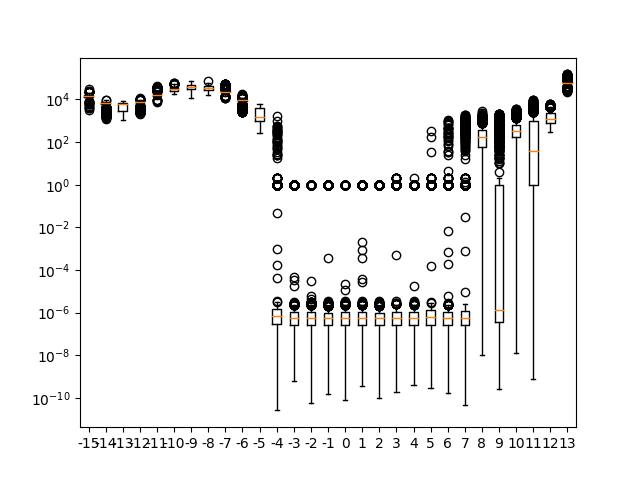

In [169]:
plt.figure()
plt.boxplot(errors, labels=sorted(set(df["distance"])))
plt.yscale("log")
plt.savefig("reports/refine-shift.svg")

### TODO: map convergence to correlation